In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.svm import LinearSVC

import utils

plt.style.use('fivethirtyeight')
#from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
train = dd.read_csv('../input/alta2018traindata/train_data.csv')
train['filename'] = ['../input/alta2018patents/patents/patents/'] + train['id'].astype(str) + ['.txt']

test = dd.read_csv('../input/alta2018testdata/test_data.csv')
test['filename'] = ['../input/alta2018patents/patents/patents/'] + test['id'].astype(str) + ['.txt']


In [ ]:
NORMALIZE = True

if NORMALIZE:
    vector_input = 'context'
    train_texts = train['filename'].apply(utils.normalize_text)
    test_texts = test['filename'].apply(utils.normalize_text)
else:
    vector_input = 'filename'
    train_texts = train['filename']
    test_texts = test['filename']
    
train_labels = train['first_ipc_mark_section']

In [7]:
tfidf = TfidfVectorizer( 
    input=vector_input,
    encoding='iso8859-1',
    stop_words='english',
    strip_accents='unicode',
    ngram_range=(1, 2)
)


clf = Pipeline(steps=[
    ('tfidf', tfidf), 
    ('svm', LinearSVC(class_weight='balanced'))
])

Get scores on training set using cross-fold validation:

In [10]:
scores = utils.get_train_scores(clf, train)
scores.mean()

0.7268213383282938

In [ ]:
scores = utils.get_train_scores(clf, train)
scores.mean()

Generate a subission:

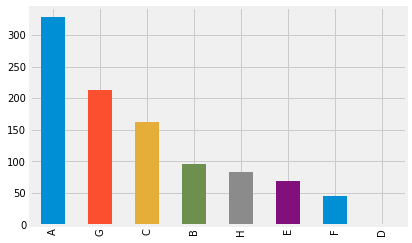

In [12]:
clf.fit(train_texts, train_labels)
test['first_ipc_mark_section'] = clf.predict(test_texts)
test[['id', 'first_ipc_mark_section']].to_csv('test_results.csv', index=False)
test['first_ipc_mark_section'].value_counts().plot.bar()